In [1]:
%pip install pytesseract
%pip install tesseract
%pip install opencv-python

import pytesseract
import cv2

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install scikit-image
%pip install matplotlib
from skimage.io import imread  # pip install scikit-image
import numpy as np
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.



In [3]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

###Exemplo da aula

In [4]:
img=cv2.imread(r'C:\Users\054181631\Downloads\imagem_com_texto.jpeg',1)

In [5]:
texto_extraido = pytesseract.image_to_string(img)

In [6]:
print(texto_extraido)

“That’s one small step
for man, one giant leap
for mankind.”

Neil Armstrong
1930 - 2012




###Usando arquivo webp com fundo claro

imagem original: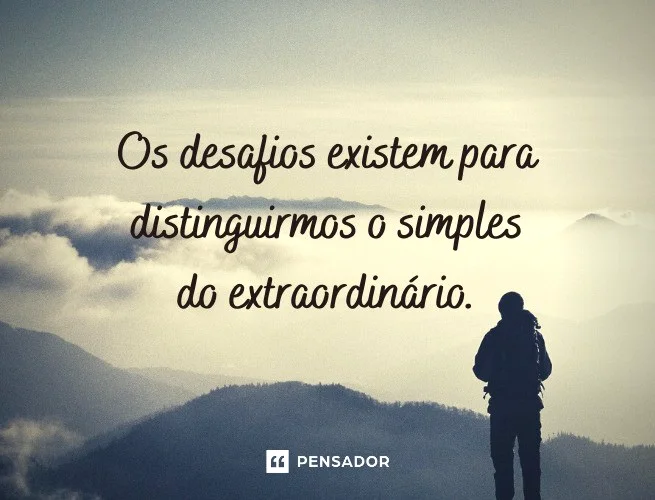

In [7]:
img2 = cv2.imread('ocr1.webp')

In [8]:
texto_extraido2 = pytesseract.image_to_string(img2)

In [9]:
print(texto_extraido2)

Os desafios existem para

ag do extraordinério.

[] Pensapor



a letra levemente estilizada da imagem parece ter causado problemas para a leitura do OCR


###Arquivo JPG com letra e fundo claro

imagem original: 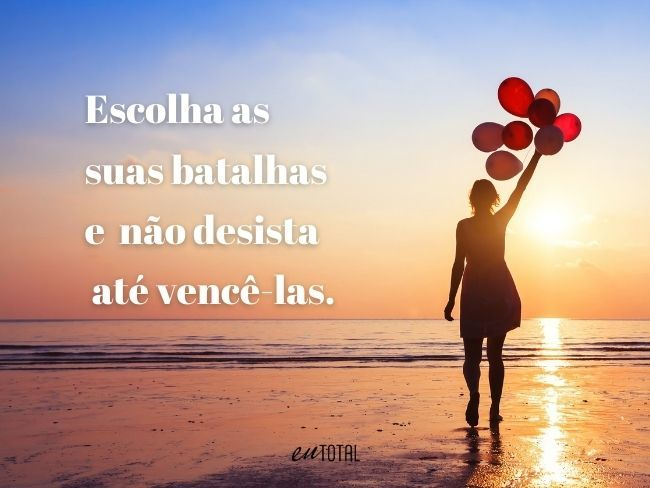

In [10]:
img3 = cv2.imread('ocr2.jpg')
texto_extraido3 = pytesseract.image_to_string(img3)
print(texto_extraido3)

não parece ter sido possível ler nada da imagem acima. Talvez as letras brancas e fundo claro tenham impactado na capacidade do programa de reconhecer as letra

###Imagem com letras coloridas

imagem original: 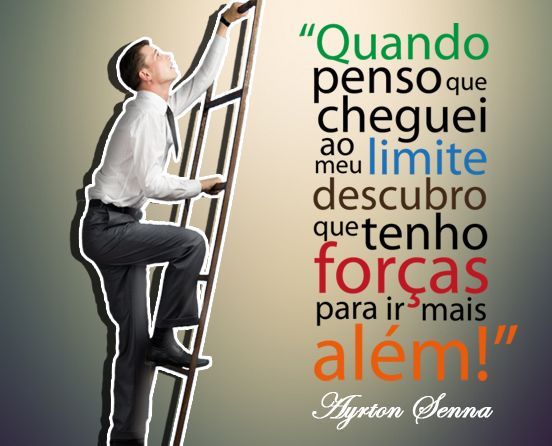

In [11]:
img4 = cv2.imread('ocr3.jpg')
texto_extraido4 = pytesseract.image_to_string(img4)
print(texto_extraido4)

“Quando

PenSOque
cheguei

oie ;

descubro




letras de diferentes cores não parecem ter efeito na capacidade de leitura, mas a partir da estilização e diferentes tamanhos de letra, o programa apresentou erros

###Arquivo avif com letras customizadas

imagem original: ocr4.avif

In [12]:
img5 = cv2.imread('ocr4.avif')
#texto_extraido5 = pytesseract.image_to_string(img5)

try:
    texto_extraido5 = pytesseract.image_to_string(img5)
    print(texto_extraido5)
except:
    print("arquivo avif não é suportado pelo modelo")

arquivo avif não é suportado pelo modelo


In [13]:
%pip install pillow-avif-plugin
from PIL import Image
import pillow_avif

Note: you may need to restart the kernel to use updated packages.


In [14]:
img5 = Image.open('ocr4.avif')
img5.save('ocr4.jpg')

In [15]:
img5 = cv2.imread('ocr4.jpg')
try:
    texto_extraido5 = pytesseract.image_to_string(img5)
    print(texto_extraido5)
except:
    print("arquivo avif não é suportado pelo modelo")

SVOCEES
PROJ JETO




as letras muito estilizadas parecem ter sido um problema para o programa
além disso, recursos estilizados parecem ter sido identificados incorretamente como letras

###teste

In [16]:
img6 = cv2.imread('ocr5.jpg')
texto_extraido6 = pytesseract.image_to_string(img6)
print(texto_extraido6)

SCANNING RESULTS
300dpi vs 200dpi

este ere =
B MEDICARE
’

Best Case 300dpi:

Scanned with Fujitsu scanner

with PaperStream cleanup installed
for image cleanup and 300dpi output.

Name was highlighted on the original
document, but ABBYY FlexiCapture
and the 300dpi resolution contributed
to 100% accuracy in OCR results.

200dpi Greyscale: NAME (Last Name, Freth ame, Middle Initial) i

This image was scanned with a ¥ :
multi-function printer in greyscale zs
with 200dpi output. You'll note that
the highlighted name “Jefferson,
David J." was not OCR’d, but instead
got skipped and ABBYY looked
down to the Zip Code and
Telephone fields to populate the
Name field.

Accuracy indicated as 50%.

lame |[i2345 1(800)55"7"

MEDICARE MEDICAID CHAMPUS CHAMPVA
(Medic (Sponsor's SSN) [J (VA File

200dpi Color:

This document was scanned in

the original color format without
image cleanup with output of 200dpi
resolution. You can see

that the engine was looking in the
appropriate field, however, it
r

In [17]:
img7 = cv2.imread('ocr6.jpg')
texto_extraido7 = pytesseract.image_to_string(img7)
print(texto_extraido7)

Aa
Bb
vv
Gg
Dd
Ge

Zh zh
Zz
Dz dz
I
jj
Kk
Li

Mm



In [18]:
#OCR é bem dependente de contraste (ideal são fundos claros com letras pretas) e da resolução da imagem. Quando um desses fatores não é cumprido, a qualidade da identificação cai consderavelmente

###Tentativa de melhorar a identificação da imagem img3

In [19]:
type(img3)

numpy.ndarray

In [20]:
img3.shape

(488, 650, 3)

In [21]:
def compare(
    original,
    filtered,
    title_filtered="Filtered",
    cmap_type="gray",
    axis=False,
    title_original="Original",
):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)

    ax1.imshow(original, cmap=cmap_type)
    ax1.set_title(title_original)

    ax2.imshow(filtered, cmap=cmap_type)
    ax2.set_title(title_filtered)

    if not axis:
        ax1.axis("off")
        ax2.axis("off")
    plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0.01)
    plt.margins(0, 0)
    plt.show();

In [22]:
def show(image: np.ndarray, title="Image", cmap_type="gray", axis=False):
    """
    A function to display np.ndarrays as images
    """
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    if not axis:
        plt.axis("off")
    plt.margins(0, 0)
    plt.show();

In [23]:
from skimage.color import rgb2gray

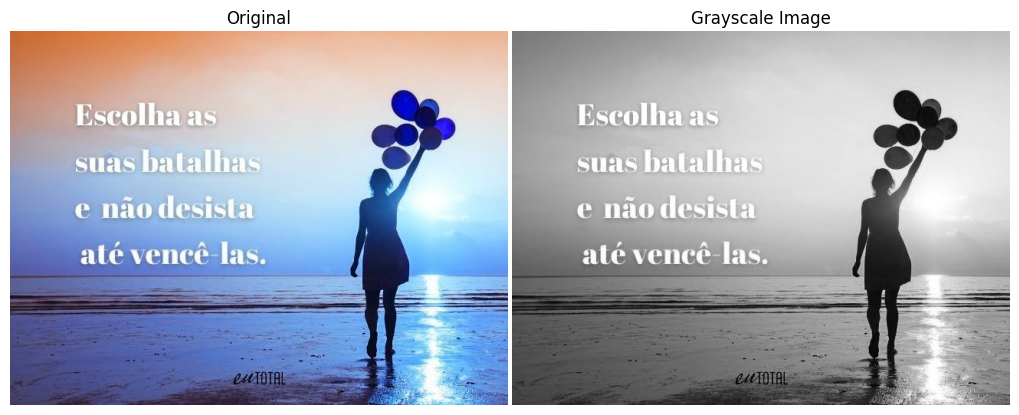

In [24]:
gray_balloon_array = rgb2gray(img3)

compare(img3, gray_balloon_array, "Grayscale Image")

In [25]:
gray_balloon_array.dtype

dtype('float64')

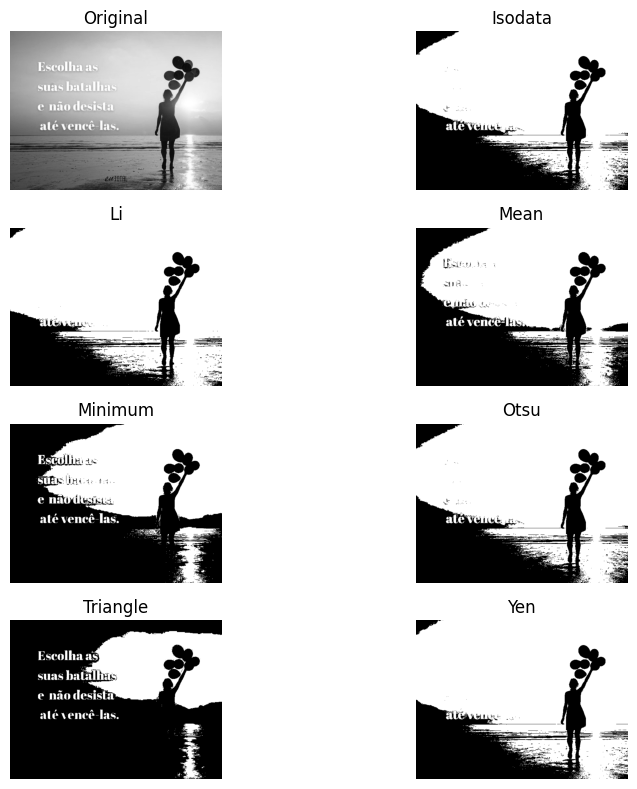

In [26]:
from skimage.filters import try_all_threshold

fig, ax = try_all_threshold(
    gray_balloon_array, figsize=(10, 8), verbose=False
  )

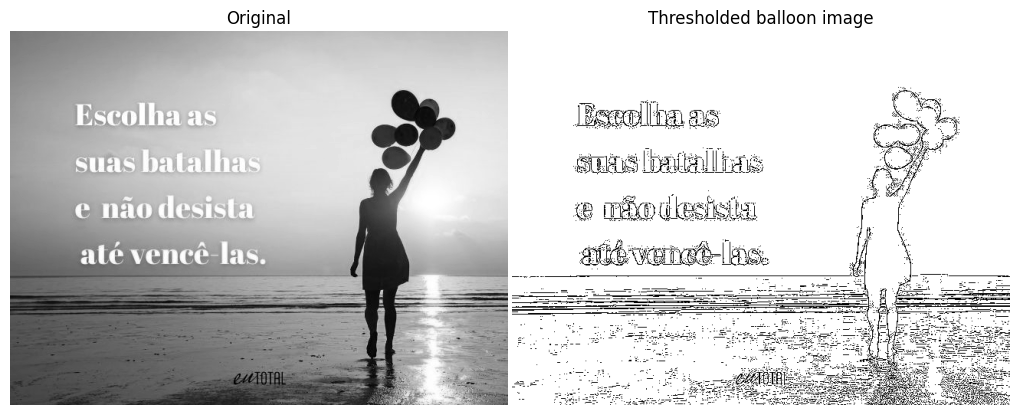

In [27]:
from skimage.filters import threshold_local

local_thresh = threshold_local(gray_balloon_array, block_size=3, offset=0.00095)

binary_flower = gray_balloon_array > local_thresh

compare(gray_balloon_array, binary_flower, "Thresholded balloon image")

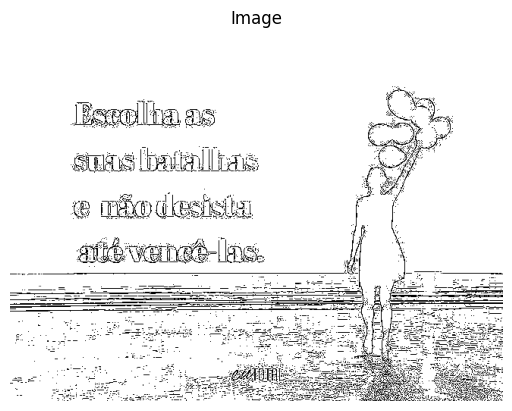

In [28]:
show(binary_flower)

In [29]:
texto_extraido_threshold = pytesseract.image_to_string(binary_flower)
print(texto_extraido_threshold)

Eseollha as

@ ROU




ao tentar fazer a leitura usando o método de threshold local não houve grande melhora

abaixo vamos tentar utilizar o melhor método de threshold global que encontramos acima (triângulo) para ver o resultado que obteríamos

In [30]:
from skimage.filters import threshold_triangle

In [31]:
thre_tri = threshold_triangle(gray_balloon_array)
binary_tri = gray_balloon_array > thre_tri

In [32]:
texto_extraido_tri = pytesseract.image_to_string(binary_tri)
print(texto_extraido_tri)

e nao desista

alé vencé-las.




o resultado fica melhor do que antes, mas mesmo utilizando o melhor método dos disponíveis anteriormente, o resultado ainda fica bem abaixo do esperado

####Método de normalização

In [33]:
img3.dtype

dtype('uint8')

imagem de 8 bits, ou seja, normalização deve ser feito de acordo com o tipo de imagem conforme https://www.imaios.com/en/resources/blog/ct-images-normalization-zero-centering-and-standardization

In [34]:
normalized_img = img3 / 255

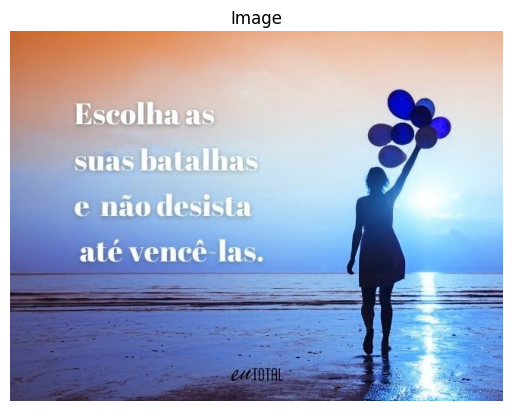

In [35]:
show(normalized_img)

In [36]:
texto_extraido_normal = pytesseract.image_to_string(normalized_img)
print(texto_extraido_normal)

TypeError: Cannot handle this data type: (1, 1, 3), <f8

o erro acontece pois o PIL espera um array uint com valores entre 0 e 255, mas recebe um float de 0 a 1, por isso acontece o erro. Uma forma de corrigir seria multiplicar por 255, mas isso retiraria a normalização, portanto não é possível seguir dessa forma

####Criando um Threshold manualmente

In [37]:
threshold = 0.87

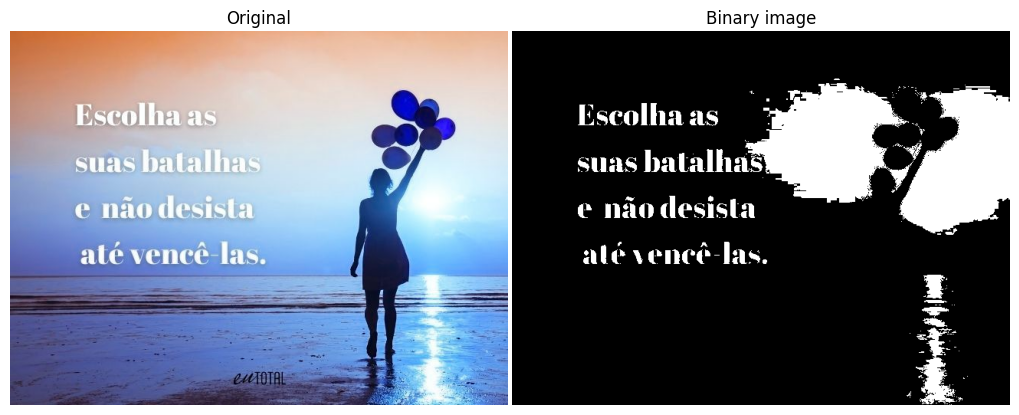

In [38]:
binary_image = gray_balloon_array > threshold
compare(img3, binary_image, "Binary image")

In [39]:
texto_extraido_binary = pytesseract.image_to_string(binary_image)
print(texto_extraido_binary)

Escolha as

suas batalhas

e nao desista

até vencé-las.




o valor do threshold foi obtido arbitrariamente após inúmeras tentativas, mas com exceção da pontuação, finalmente obtivemos o resultado satisfatório da frase

####Funções de Threshold manuais

na função abaixo, teremos parâmetros da imagem a ser testada, o threshold inicial, o intervalo de teste de cada threshold até um valor de teto onde a função deve parar

In [40]:
def best_threshold (image, threshold, intervalo, teto):
    gray_image = rgb2gray(image)
    while threshold <= teto: #se colocar 1 ele não chega a um por causa do arrendondamento, é preciso colocar maior
        print('Threshold:', threshold)
        imagem_funcao = gray_image > threshold
        texto_extraido_funcao = pytesseract.image_to_string(imagem_funcao)
        print(texto_extraido_funcao)
        threshold += intervalo
    return print(texto_extraido_funcao)


In [41]:
best_threshold(img3, 0.7, 0.05, 1.0)

Threshold: 0.7

Threshold: 0.75
até vencé-las.


Threshold: 0.8
Escolha xt

suas hatalin
e nao desist

até vencé-las.


Threshold: 0.8500000000000001
Escolha as

suas batallhas

e nao desista

alé vencé-las.


Threshold: 0.9000000000000001
Escolha as
suas balalhas

e nao desista

alé vencé las.


Threshold: 0.9500000000000002
Eseolha as
suas batalhas

e nao desista

ale vence las.


Eseolha as
suas batalhas

e nao desista

ale vence las.




o pacote abaixo permite a comparação entre textos para avaliar a similaridade

In [42]:
%pip install thefuzz

Note: you may need to restart the kernel to use updated packages.


In [43]:
from thefuzz import fuzz

a função abaixo tem papel semelhante à anterior, contudo ela retornará todos os valores de threshold e índice de similaridade e ao final o threshold que alcançou o máximo de similaridade

In [44]:
def best_threshold_text (image, threshold, intervalo, teto, frase_correta):
    gray_image = rgb2gray(image)
    similarity_list = []
    threshold_list =[]
    while threshold <= teto: #se colocar 1 ele não chega a um por causa do arrendondamento, é preciso colocar maior
        print('Threshold:', threshold)
        imagem_funcao = gray_image > threshold
        texto_extraido_funcao = pytesseract.image_to_string(imagem_funcao)
        threshold_list.append(threshold)
        similarity_list.append(fuzz.partial_ratio(frase_correta, texto_extraido_funcao))
        print(f"Similarity score: {fuzz.partial_ratio(frase_correta, texto_extraido_funcao)}")
        threshold += intervalo
    return print('o melhor Threshold é o',threshold_list[similarity_list.index(max(similarity_list))], 'com uma similaridade de', max(similarity_list))

In [45]:
best_threshold_text(img3, 0.7, 0.05, 1.01, "Escolha as suas batalhas e não desista até vencê-las")

Threshold: 0.7
Similarity score: 0
Threshold: 0.75
Similarity score: 83
Threshold: 0.8
Similarity score: 77
Threshold: 0.8500000000000001
Similarity score: 82
Threshold: 0.9000000000000001
Similarity score: 81
Threshold: 0.9500000000000002
Similarity score: 79
Threshold: 1.0000000000000002
Similarity score: 0
o melhor Threshold é o 0.75 com uma similaridade de 83


se comparamos esse resultado com o da função anterior, ainda está longe do ideal, pois mesmo que a similaridade de 0.75 seja a mais alta, há apenas uma parte da frase correta, enquanto que em outros thresholds há mais partes da frase correta. De acordo com a documentação, isso pode ser porque uma frase curta e mais correta tem um índice de similaridade maior do que uma frase longa com mais acertos, mas também mais erros
seria necessário avaliar a documentação mais ostensivamente para determinarmos o melhor método a utilizar nesse caso

https://www.datacamp.com/tutorial/fuzzy-string-python

###Usando a função nas outras imagens

In [46]:
best_threshold(img2, 0.3, 0.05, 1.05)

Threshold: 0.3
Os desafios existem para
distinguirmos o simples
do extraordinério.


Threshold: 0.35
Os desafios existem para
~ _ distinguirmas o simples
. do extracrdinério.


Threshold: 0.39999999999999997
Os desafios existem para
os istinguirmos o simples

‘ do extraordinério.

Gy Pensapon

Threshold: 0.44999999999999996
Os desafios existem para
ma distinguirmos o simples
m do extraordindrio.

EJ Pensapor

Threshold: 0.49999999999999994
Os desafios existem para

istinguirmos o simples
BR do extraordinério.

Ej Pensapor

Threshold: 0.5499999999999999
Os desafios existem para

Pag fl slingquirmos o simples
do extraordinério.

Ej Pensapor

Threshold: 0.6
Os desafios existem para.

do extraordinéri

Ej Pensapor

Threshold: 0.65
Os desofios existem para,

do extraordindéri

Ej Pensapor

Threshold: 0.7000000000000001
do extraordindrio,

(@] Pensapor

Threshold: 0.7500000000000001
3 0s desajios existem para.

do extraordindrio,

[J Pensapor

Threshold: 0.8000000000000002
Os desi existem, p

In [47]:
best_threshold_text(img2, 0.3, 0.05, 1.05, "Os desafios existem para distinguirmos o simples do extraordinário" )

Threshold: 0.3
Similarity score: 95
Threshold: 0.35
Similarity score: 88
Threshold: 0.39999999999999997
Similarity score: 91
Threshold: 0.44999999999999996
Similarity score: 92
Threshold: 0.49999999999999994
Similarity score: 92
Threshold: 0.5499999999999999
Similarity score: 83
Threshold: 0.6
Similarity score: 66
Threshold: 0.65
Similarity score: 63
Threshold: 0.7000000000000001
Similarity score: 64
Threshold: 0.7500000000000001
Similarity score: 59
Threshold: 0.8000000000000002
Similarity score: 58
Threshold: 0.8500000000000002
Similarity score: 45
Threshold: 0.9000000000000002
Similarity score: 42
Threshold: 0.9500000000000003
Similarity score: 43
Threshold: 1.0000000000000002
Similarity score: 0
o melhor Threshold é o 0.3 com uma similaridade de 95


é interessante ver que não só números de threshold altos garantem uma similaridade maior. No caso da primeira imagem, se o Threshold for muito alto a similaridade fica menor, possivelmente por nesse caso as letras estarem em preto e o restante se confundir com as letras conforme o threshold aumenta

In [48]:
best_threshold(img4, 0.55, 0.05, 1.0)

Threshold: 0.55

Threshold: 0.6000000000000001
“Quando


Threshold: 0.6500000000000001

Threshold: 0.7000000000000002

Threshold: 0.7500000000000002

Threshold: 0.8000000000000003

Threshold: 0.8500000000000003

Threshold: 0.9000000000000004
,

« Lyvton Penna

Threshold: 0.9500000000000004




In [49]:
best_threshold_text(img4, 0.4, 0.05, 1.0, "Quando penso que cheguei ao meu limite descubro que tenho forças para ir mais além!")

Threshold: 0.4
Similarity score: 64
Threshold: 0.45
Similarity score: 60
Threshold: 0.5
Similarity score: 76
Threshold: 0.55
Similarity score: 0
Threshold: 0.6000000000000001
Similarity score: 80
Threshold: 0.6500000000000001
Similarity score: 0
Threshold: 0.7000000000000002
Similarity score: 0
Threshold: 0.7500000000000002
Similarity score: 0
Threshold: 0.8000000000000003
Similarity score: 0
Threshold: 0.8500000000000003
Similarity score: 0
Threshold: 0.9000000000000004
Similarity score: 29
Threshold: 0.9500000000000004
Similarity score: 0
o melhor Threshold é o 0.6000000000000001 com uma similaridade de 80


provavelmente impactado pelas letras de várias cores e tamanhos que não ficam tão bem na escala de cinza

In [50]:
best_threshold(img5, 0.3, 0.05, 1.0)

Threshold: 0.3
WOCEES
A PROJ JETO


Threshold: 0.35
VOCEES
‘OPROUE ETO


Threshold: 0.39999999999999997
SVOCE-ES
0 PROJ JETO


Threshold: 0.44999999999999996
SVWAENES
(0 PROJ JETO


Threshold: 0.49999999999999994
ZVOCE: ES
0 PROJ JETO


Threshold: 0.5499999999999999
SVWOCEES
O PROJ JETO


Threshold: 0.6
SVOCEES
0 PROJETO


Threshold: 0.65
SVWACEES
0 PROJETO JETO


Threshold: 0.7000000000000001
SVOCEES
0 PROJETO


Threshold: 0.7500000000000001
aes ES
O PROJETO


Threshold: 0.8000000000000002
SVOCEES
Q PROJETO


Threshold: 0.8500000000000002
SUOCEES
0 PROJETO


Threshold: 0.9000000000000002
SVOCE-E ES
OPROJETO


Threshold: 0.9500000000000003
SVOCEES
QO PROJETO


SVOCEES
QO PROJETO




In [51]:
best_threshold_text(img4, 0.3, 0.05, 1.0, "Você é o projeto mais importante da sua vida")

Threshold: 0.3
Similarity score: 33
Threshold: 0.35
Similarity score: 36
Threshold: 0.39999999999999997
Similarity score: 24
Threshold: 0.44999999999999996
Similarity score: 35
Threshold: 0.49999999999999994
Similarity score: 28
Threshold: 0.5499999999999999
Similarity score: 0
Threshold: 0.6
Similarity score: 38
Threshold: 0.65
Similarity score: 0
Threshold: 0.7000000000000001
Similarity score: 0
Threshold: 0.7500000000000001
Similarity score: 0
Threshold: 0.8000000000000002
Similarity score: 0
Threshold: 0.8500000000000002
Similarity score: 0
Threshold: 0.9000000000000002
Similarity score: 28
Threshold: 0.9500000000000003
Similarity score: 0
o melhor Threshold é o 0.6 com uma similaridade de 38


as letras são tão estilizadas e com caracteres especiais, que a similaridade encontrada foi baixíssima